### import python libraries

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import SimpleImputer

### Load the train dataset using pandas

In [2]:
#read in the datasets
train = pd.read_csv("train.csv")

#display those datas
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
print('The Rows and Columns of the data are:', train.shape)

The Rows and Columns of the data are: (891, 12)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Explanatory Data Analysis (EDA) For Train Dataset
get the missing values for each colums

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.isnull().sum() / train.shape[0]* 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

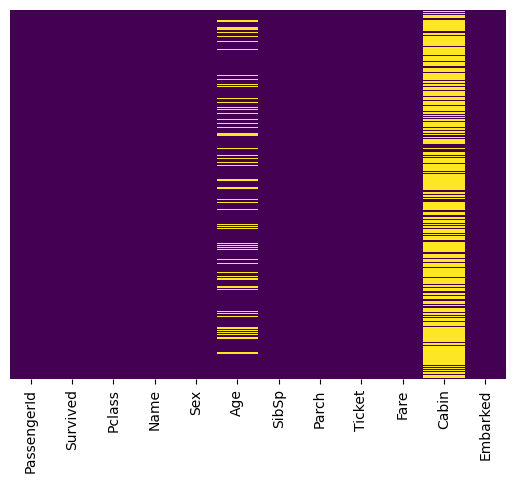

In [8]:
# to get the missing value using heatmap
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis");

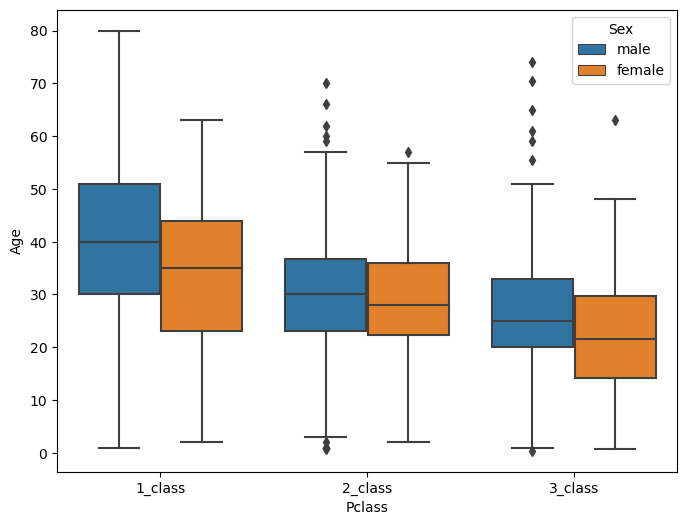

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Pclass", y="Age", data=train, hue="Sex")
plt.xticks([0, 1, 2],["1_class","2_class","3_class"]);

### Observations
1. it shows that those in the first class ticket are more of age with average male age of 40years and 35 forfemales
2. Those in the third class are younger passengers with average male age of 27years and 22 for female

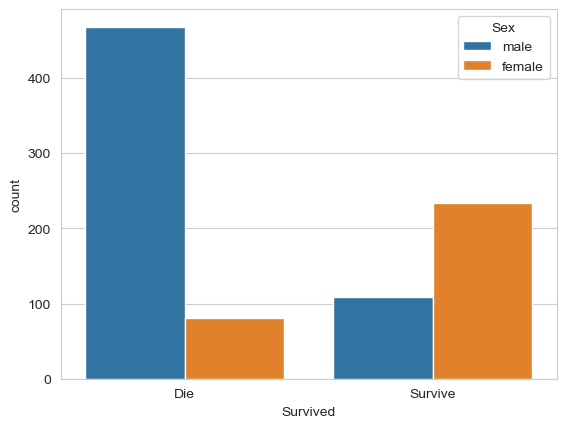

In [10]:
# get a countplot of the survival column with the gender.
sns.set_style("whitegrid")
label = ["Die", "Life"]
sns.countplot(x="Survived", hue="Sex", data=train)
plt.xticks([0,1],["Die", "Survive"]);

### observation
1. The people who did not survive are those in the third class followed by middle class, with first class having the less dead.
2. Those who are in the first class is obviously leading the survival rate followed by those in the third class.
3. It shows that people with third class ticket are much more than other class ticket.

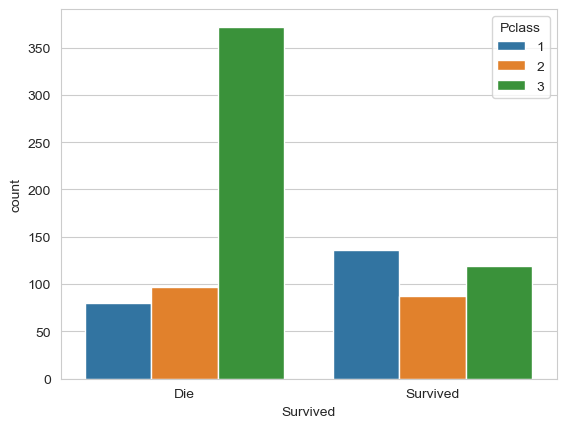

In [11]:
# get a countplot of the survival of the survival with a hue of the passenger class
sns.countplot(x="Survived", hue="Pclass", data=train)
plt.xticks([0,1], ["Die", "Survived"]);

<Axes: xlabel='Age', ylabel='Count'>

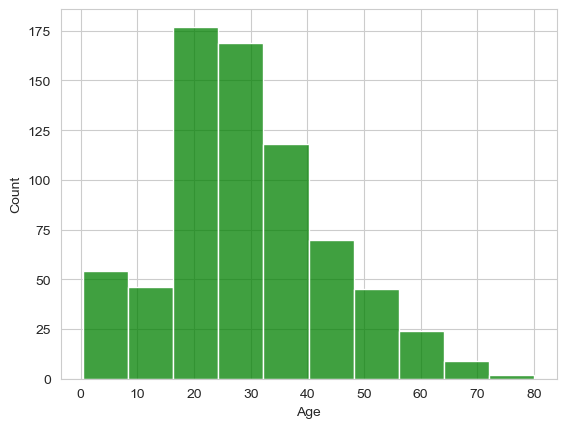

In [12]:
sns.histplot(x='Age', color='green', bins=10, data=train)

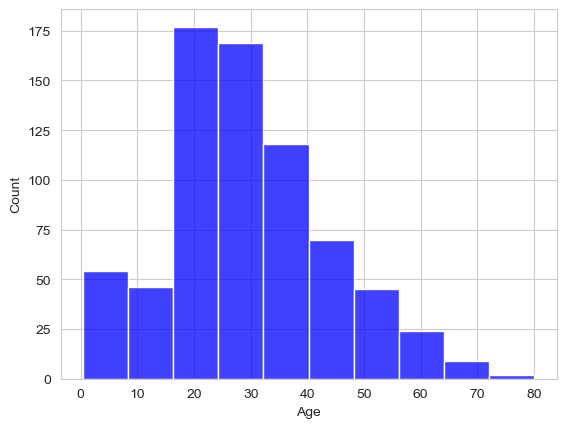

In [13]:
# get the distribution plot of the age column
sns.histplot (train["Age"], color="blue", bins=10);

### Obseravation
1. The most range on board range from 20 to 40 indicates more younger passengers. 
2. The age tend to regress towards the right indicating the older the passenger the fewer the count.

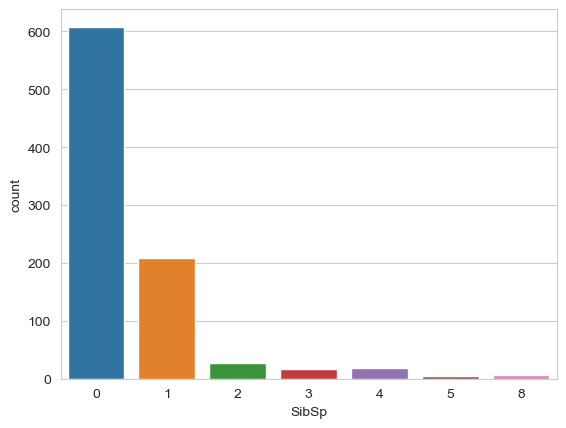

In [14]:
# To get the number of passenger with their siblings or family
sns.countplot(x='SibSp', data=train);

### Observation: This shows that most passengers on board do not have neither children or siblings.

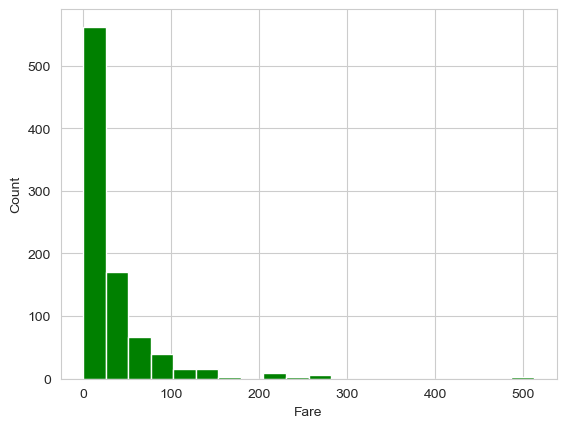

In [15]:
# to get how much people pay as a distribution 
plt.hist(train["Fare"], color="green", bins=20)
plt.xlabel('Fare')
plt.ylabel('Count');

### Most fare are between 20 and 40 which indicate the most passenger purchased the third class ticket.

## PART TWO

### Cleaning the Data "Imputation"

In [16]:
# cleaning the data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


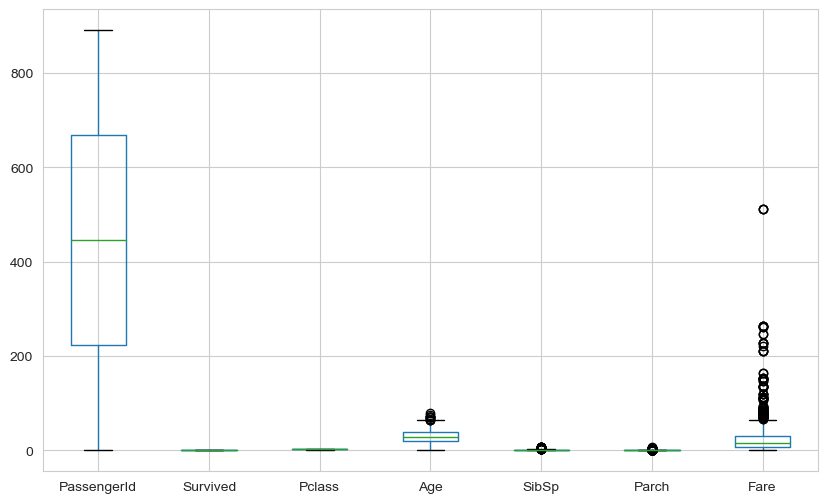

In [17]:
train.boxplot(figsize=(10,6));

<Axes: xlabel='Pclass', ylabel='Age'>

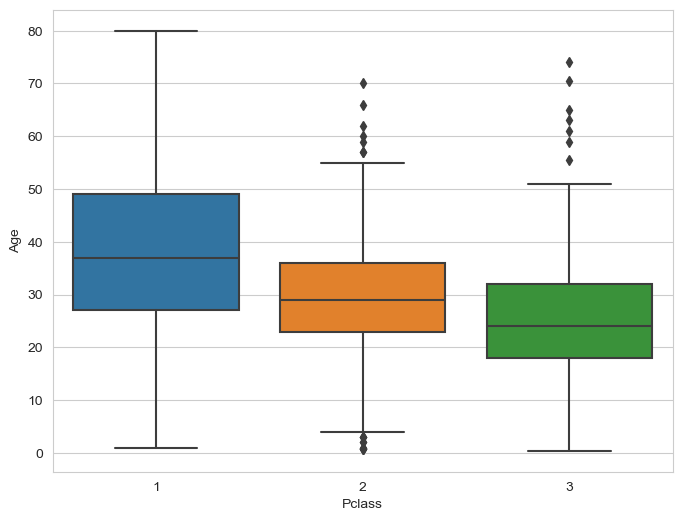

In [18]:
# to get the average age of passenger class
plt.figure(figsize=(8,6))
sns.boxplot(x="Pclass", y="Age", data=train)

### Obesrvation: The wealthier passenger in the first class tend to be older than those in the second class and third class

In [19]:
# create a function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 28
        elif Pclass == 3:
            return 24
    else:
            return Age

In [20]:
# apply the function to Age and Pclass colums
train['Age'] = train[["Age", "Pclass"]].apply(impute_age, axis=1)

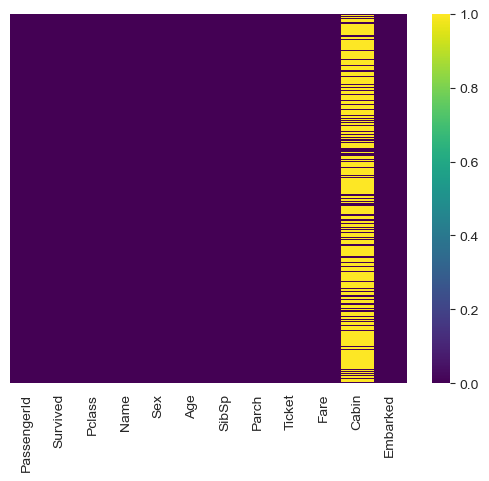

In [21]:
# check for missing values
sns.heatmap(train.isnull(), yticklabels=False, cbar=True, cmap="viridis");

### Obsrvations: There is no longer missing value for age column

Fill the missing embarked value,

In [22]:
# fill the embarked column with the most frquence values
fill_Embarked = train['Embarked']. mode()[0]

# use fillna function to effect the change
train["Embarked"]. fillna(fill_Embarked, inplace=True)

In [23]:
# to drop the cabin column because of too much missing values
train.drop("Cabin", axis=1, inplace=True)

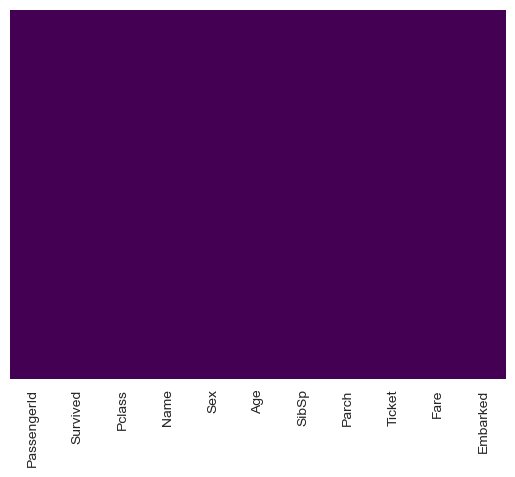

In [24]:
# get a visualization of the train columns
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis");

### Observation:There is no missing values in the datasets.

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [27]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
train.isnull().sum()/ train.shape[0]* 100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

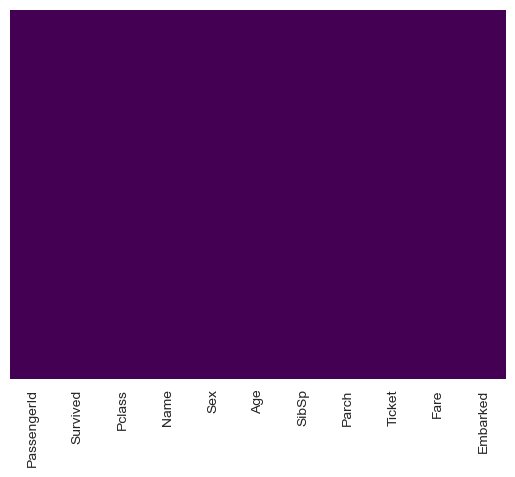

In [29]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

### Heatmap Correlation Plot

In [30]:
# create a copy of the dataset
train_clean= train.copy()

In [31]:
train_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
# store the clean dataset
train_clean.to_csv("train_clean.csv", index=False)

## PART THREE

### String Method

In [33]:
train_clean= pd.read_csv('train_clean.csv')
train_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### How to rename a column

In [34]:
# Rename Parch columns into parent
train_clean.rename(columns={'Parch':'Parent'}, inplace=True)
train_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parent,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
# can only call the rows but not columns
train_clean[300:303]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parent,Ticket,Fare,Embarked
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,24.0,0,0,9234,7.75,Q
301,302,1,3,"McCoy, Mr. Bernard",male,24.0,2,0,367226,23.25,Q
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.00,S


In [36]:
#mindex location can call both rows and columns
train_clean.iloc[20:28,:3]

,PassengerId,Survived,Pclass
20,21,0,2
21,22,1,2
22,23,1,3
23,24,1,1
24,25,0,3
25,26,1,3
26,27,0,3
27,28,0,1


In [37]:
train_clean.iloc[500:506, -5:]

,SibSp,Parent,Ticket,Fare,Embarked
500,0,0,315086,8.6625,S
501,0,0,364846,7.7500,Q
502,0,0,330909,7.6292,Q
503,0,0,4135,9.5875,S
504,0,0,110152,86.5000,S
505,1,0,PC 17758,108.9000,C


### How to serach for an item

In [38]:
# Name of Doctor Passenger
train_clean[train_clean['Name'].str.contains("Dr. ")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parent,Ticket,Fare,Embarked
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,Q
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,S
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,S
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,C
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,S
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,37.0,0,0,112379,39.6000,C
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,S


In [39]:
# Name of Rev Passenger
train_clean[train_clean['Name'].str.contains("Rev")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parent,Ticket,Fare,Embarked
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,S
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,S
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,Q
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,S


In [40]:
train_clean[train_clean['Name'].str.contains("Rev")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parent,Ticket,Fare,Embarked
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,S
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,S
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,Q
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,S


### Extract only the title in the name columns
The code below gives the correct title count of the name columns

In [41]:
title= train_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [42]:
title.value_counts()

Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

### Name with title master.

In [43]:
# View the name column with master title
train_clean[train_clean['Name'].str.contains('Master')][:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parent,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S


In [44]:
# Replace title name Master to Slaves
slaves=train_clean['Name'].str.replace('Master', 'Slaves', regex=True)
slaves.iloc[50]

'Panula, Slaves. Juha Niilo'

### Note: to save a change you have to create a new column.

# PART FOUR

In [45]:
df = pd.read_csv('train_clean.csv')
print('Shape of df:', df.shape)
df.head()

Shape of df: (891, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [46]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Feature Engineering

In [47]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


### Title Map.
Mr= 0
Miss= 1
Mrs= 2
Master= 3
Others= 4

In [49]:
title_map = {
    'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Dr':4, 'Rev':4,
    'Mlle':4, 'Major':4, 'Col':4, 'Countess':4, 'Capt':4,
    'Ms':4, 'Sir':4, 'Lady':4, 'Mme':4, 'Don':4, 'Jonkheer':4}
df['Title'] = df['Title'].map(title_map)

In [50]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1


### Sex Binning

In [51]:
sex_map = {'female':1, 'male':0}
df['Sex']= df['Sex'].map(sex_map)

In [52]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1


### Embarked Binning

In [53]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [54]:
embark_map = {'S':0, 'C':1, 'Q':2}
df['Embarked']= df['Embarked'].map(embark_map)

In [55]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1


### Drop Columns

In [56]:
# Drop irrelevant columns
df.drop(['PassengerId','Name', 'Ticket'], axis=1, inplace=True)

In [57]:
print(f"Shape of data:", df.shape)
df.head()

Shape of data: (891, 9)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,2
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,2
4,0,3,0,35.0,0,0,8.0500,0,0


### Data Partitioning
Split your dataset into training and testing.

In [58]:
x = df.drop('Survived', axis=1)    #feature
y = df['Survived']

In [59]:
print(x.shape)
print(y.shape)

(891, 8)
(891,)


### Import train_test split libraries from sklearn.

In [60]:
# to import train_test split
from sklearn.model_selection import train_test_split

### Train-Test data ratio allocation
Train data = 80%
Test data = 20%

In [61]:
# set your size to 20% and random state to 42
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [62]:
print(x_train.shape)
print(x_test.shape)

(712, 8)
(179, 8)


### Create Machine Learning Model.
Import Logistic Regression


In [63]:
# import logistic regression model
from sklearn.linear_model import LogisticRegression

### Instantiate the model

In [64]:
# instantiate the model
model = LogisticRegression()

### Train the model using the training set

In [65]:
# train your model
model.fit(x_train, y_train)

C:\Users\pc\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Get the predictions

In [66]:
# used the testing set data to get the predictions
predictions = model.predict(x_test)
print(predictions[:15])

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0]


### Model Evaluation for Classification Model

In [69]:
# Import classification metrics
from sklearn.metrics import classification_report

### To evaluate the model using classification report

In [71]:
# To evaluate the model using classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.74      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
print("Training set score: {: .2f}" .format(model.score(x_train,)))